<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/02_tensorflow_NN_clasiffication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from sklearn.datasets import make_circles

In [3]:
n = 1000
X, y = make_circles(n, noise = 0.03, random_state = 42)

In [4]:
X.shape

(1000, 2)

In [5]:
X[0]

array([0.75424625, 0.23148074])

In [6]:
y.shape

(1000,)

In [7]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [8]:
X[:,0].shape

(1000,)

In [9]:
X[:1]

array([[0.75424625, 0.23148074]])

In [10]:
import matplotlib.pyplot as plt

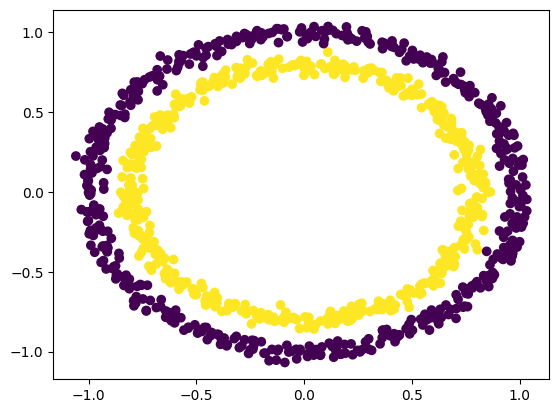

In [11]:
plt.scatter(x = X[:,0], y= X[:,1], c = y)
plt.show()

In [12]:
X.shape, y.shape

((1000, 2), (1000,))

In [13]:
len(X), len(y)

(1000, 1000)

In [14]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Sequential

In [15]:
model = Sequential(
    (
        Input(shape =(2)),
        Dense(10, activation = 'relu'),
        Dense(50, activation = 'relu'),
        Dense(50, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    )
)
model.compile(optimizer = "Adam", loss = keras.losses.BinaryCrossentropy(), metrics = ['accuracy'] )

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 50)                550       
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,181
Trainable params: 3,181
Non-trainable params: 0
_________________________________________________________________


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [18]:
ES = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', 
    patience = 2, 
    restore_best_weights= True)

In [19]:
history = model.fit(x_train, y_train, epochs = 100, callbacks=[ES], verbose = 0)
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.1474 - accuracy: 0.9933


[0.14740803837776184, 0.9933333396911621]

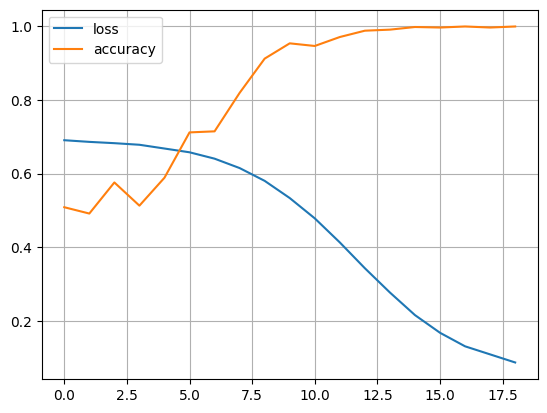

In [20]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()

In [21]:
import numpy as np
def plot_boundaries(X, y, model):
  x_min = X[:,0].min()- 0.1
  x_max = X[:,0].max()+ 0.1
  y_min = X[:,1].min() - 0.1
  y_max = X[:,1].max()+0.1

  x_points = np.linspace(x_min, x_max, 100)
  y_points = np.linspace(y_min, y_max, 100)
  xx, yy = np.meshgrid(x_points, y_points)

  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  if model.output_shape[1] > 1:
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  plt.contourf(xx, yy, y_pred, alpha=0.7)
  plt.scatter(X[:, 0], X[:,1],c = y)
  plt.show()

313/313 [==============================] - 1s 2ms/step


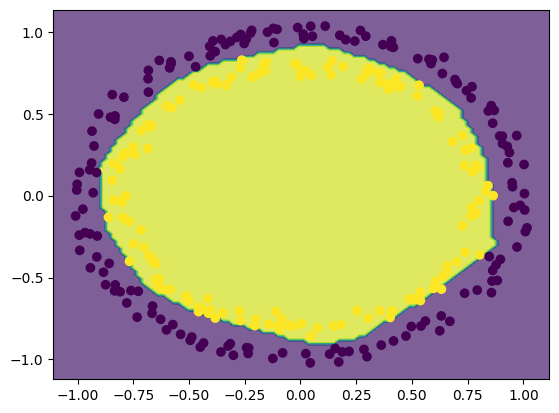

In [22]:
plot_boundaries(x_test, y_test, model)

In [23]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.1474 - accuracy: 0.9933


[0.14740803837776184, 0.9933333396911621]

313/313 [==============================] - 1s 3ms/step


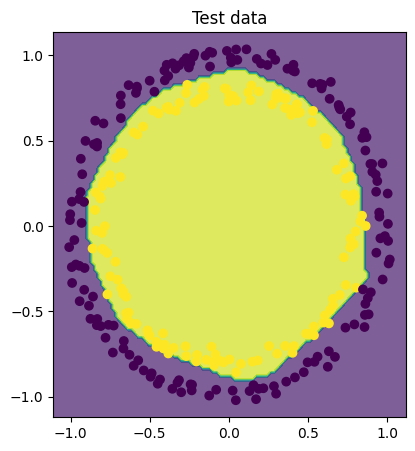

313/313 [==============================] - 1s 2ms/step


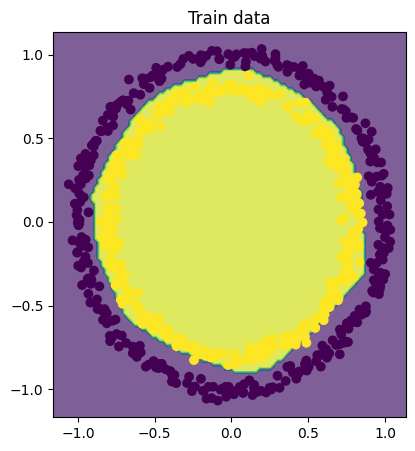

In [24]:
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title('Test data')
plot_boundaries(x_test, y_test, model)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,2)
plt.title('Train data')
plot_boundaries(x_train, y_train, model)
plt.show()

In [25]:
tf.random.set_seed(42)

In [36]:
model_8 = keras.models.Sequential((
    Dense(4, activation = 'relu'),
    Dense(4, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
))
model_8.compile(optimizer ='Adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [37]:
LR_CB = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4* 10**(epoch/20))

In [38]:
y_train.shape, x_train.shape

((700,), (700, 2))

In [39]:
history_8 = model_8.fit(x_train, 
                        y_train, 
                        callbacks = [LR_CB], 
                        epochs = 100)

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.4914 - lr: 1.0000e-04
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.4914 - lr: 1.1220e-04
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4914 - lr: 1.2589e-04
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.4914 - lr: 1.4125e-04
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4914 - lr: 1.5849e-04
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.4914 - lr: 1.7783e-04
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.4914 - lr: 1.9953e-04
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.4914 - lr: 2.2387e-04
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

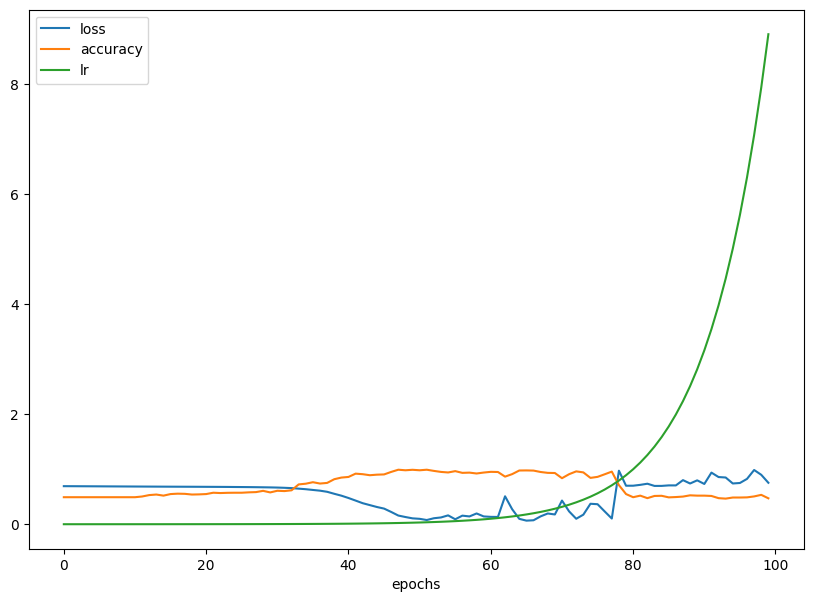

In [41]:
pd.DataFrame(history_8.history).plot(figsize = (10,7), xlabel = 'epochs')

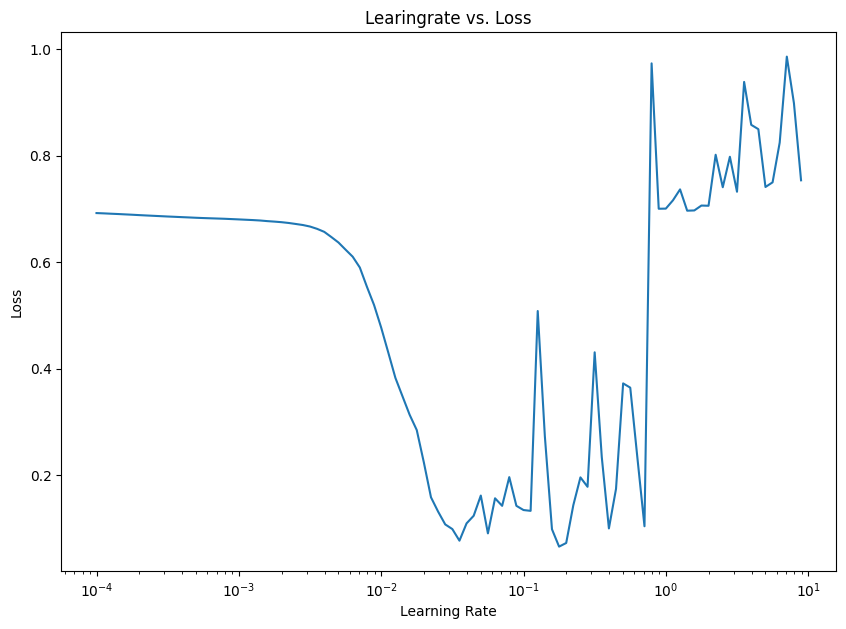

In [43]:
plt.figure(figsize = (10,7))
plt.semilogx(history_8.history['lr'], history_8.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel('Loss')
plt.title('Learingrate vs. Loss')
plt.show()

In [46]:
tf.random.set_seed(42)

In [52]:
model_9 = keras.models.Sequential((
    Dense(4, 'relu'),
    Dense(4, 'relu'),
    Dense(1, 'sigmoid'))
)
model_9.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.02), 
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

In [53]:
history_9 = model_9.fit(x_train, y_train, epochs = 20)

Epoch 1/20
22/22 [==============================] - 1s 3ms/step - loss: 0.6955 - accuracy: 0.4700
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5257
Epoch 3/20
22/22 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5671
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.6143
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.6043
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.6186
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.6643
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.7257
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.7829
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.8100
Epoch 11/20
22/22 [

In [56]:
model_9.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.03), 
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])
history_9_1 = model_9.fit(x_train, y_train, epochs = 25)

Epoch 1/25
22/22 [==============================] - 2s 5ms/step - loss: 0.0399 - accuracy: 0.9871
Epoch 2/25
22/22 [==============================] - 0s 6ms/step - loss: 0.0410 - accuracy: 0.9800
Epoch 3/25
22/22 [==============================] - 0s 4ms/step - loss: 0.0282 - accuracy: 0.9871
Epoch 4/25
22/22 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9914
Epoch 5/25
22/22 [==============================] - 0s 6ms/step - loss: 0.0350 - accuracy: 0.9857
Epoch 6/25
22/22 [==============================] - 0s 6ms/step - loss: 0.0390 - accuracy: 0.9829
Epoch 7/25
22/22 [==============================] - 0s 6ms/step - loss: 0.0388 - accuracy: 0.9857
Epoch 8/25
22/22 [==============================] - 0s 4ms/step - loss: 0.0255 - accuracy: 0.9929
Epoch 9/25
22/22 [==============================] - 0s 5ms/step - loss: 0.0237 - accuracy: 0.9914
Epoch 10/25
22/22 [==============================] - 0s 5ms/step - loss: 0.0152 - accuracy: 0.9957
Epoch 11/25
22/22 [

In [57]:
model_9.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9900


[0.0247478149831295, 0.9900000095367432]

In [61]:
loss, accuracy = model_9.evaluate(x_test, y_test)
print(f"loss of model on test set :{loss}")
print(f"accuracy of model on test set :{(accuracy*100):.2f}%")

10/10 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9900
loss of model on test set :0.0247478149831295
accuracy of model on test set :99.00%


In [64]:
from sklearn.metrics import confusion_matrix

In [67]:
y_predict = model_9.predict(x_test)

10/10 [==============================] - 0s 7ms/step


In [73]:
y_predict = tf.round(y_predict)

In [74]:
cm = confusion_matrix(y_test,y_predict)
print(cm)

[[154   2]
 [  1 143]]


In [76]:
cm_norm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
cm_norm

array([[0.98717949, 0.01282051],
       [0.00694444, 0.99305556]])

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay

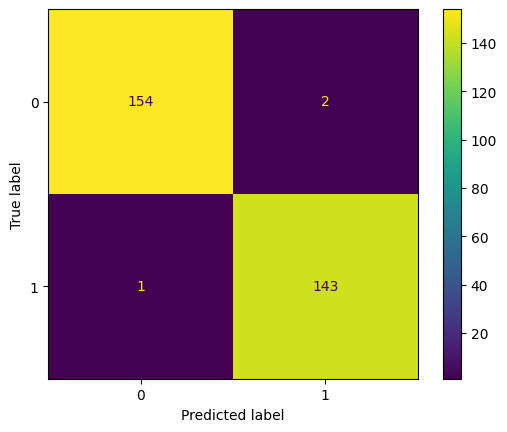

In [80]:
ConfusionMatrixDisplay(cm).plot()

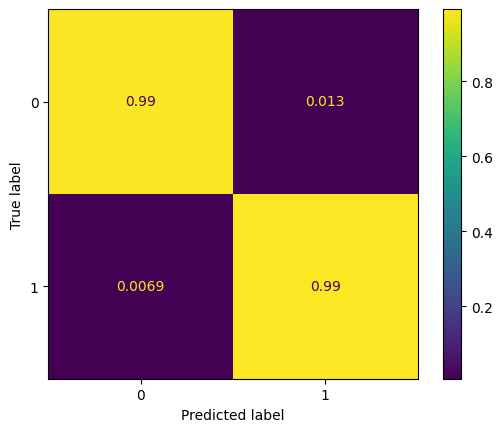

In [81]:
ConfusionMatrixDisplay(cm_norm).plot()